# Ray.tune test

- https://docs.ray.io/en/master/tune/api_docs/suggestion.html
- https://docs.ray.io/en/master/tune/api_docs/schedulers.html

### Requirements

- hyperopt, dill
- optuna, SQLAlchemy==1.3.24
- ConfigSpace, hpbandster
- ray==1.2.0, pickle5

In [1]:
import time
import numpy as np
import math
import ConfigSpace as CS
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler, HyperBandForBOHB
from ray.tune.suggest import ConcurrencyLimiter
from ray.tune.suggest.bohb import TuneBOHB
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.optuna import OptunaSearch
from hyperopt import hp

In [2]:
# ray.init()
seed = 42

In [3]:
def visualize(analysis):
    dfs = analysis.trial_dataframes
    for d in dfs.values():
        d.score.plot()
    print(analysis.get_best_config(metric="score", mode="min"))
    print([x.metric_analysis['training_iteration']['last'] for x in analysis.trials])

## Define the function to run

In [4]:
def my_trainable(config):
    def func(x, a, b):
        return np.log((a + b)**2 + ((x-5)**2)/100)

    for x in range(10):
        score = func(x, config["a"], config["b"])
        tune.report(score=score, epoch=(x + 1))

## Early stopping with ASHA

- Asynchronous Successive Halving Algorithm
- A successor of the hyperband algorithm


2021-04-20 00:51:10,905	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265
2021-04-20 00:51:12,384	WARNING function_runner.py:540 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Trial name,status,loc,a,b
my_trainable_10e12_00000,RUNNING,,-50,50


Result for my_trainable_10e12_00000:
  date: 2021-04-20_00-51-13
  done: false
  epoch: 1
  experiment_id: aa8df09b0bd9464aa594d2710e1396bb
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 21939
  score: -1.3862943611198906
  time_since_restore: 0.01387476921081543
  time_this_iter_s: 0.01387476921081543
  time_total_s: 0.01387476921081543
  timestamp: 1618847473
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 10e12_00000
  
Result for my_trainable_10e12_00001:
  date: 2021-04-20_00-51-13
  done: true
  epoch: 1
  experiment_id: 1044b54ae8214ee99b5ee2b1bf444d98
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 21940
  score: 9.210365371663688
  time_since_restore: 0.0014727115631103516
  time_this_iter_s: 0.0014727115631103516
  time_total_s: 0.0014727115631103516
  timestamp: 1618847473
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 10e12_00001
  
Result for my_trainable_10e12

(pid=21939) <ipython-input-4-b8696c0b36bc>:3: RuntimeWarning: divide by zero encountered in log


Result for my_trainable_10e12_00005:
  date: 2021-04-20_00-51-13
  done: false
  epoch: 1
  experiment_id: a5e0d464c0454b6882c52b8becdbad08
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 21938
  score: -1.3862943611198906
  time_since_restore: 0.0005078315734863281
  time_this_iter_s: 0.0005078315734863281
  time_total_s: 0.0005078315734863281
  timestamp: 1618847473
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 10e12_00005
  
Result for my_trainable_10e12_00007:
  date: 2021-04-20_00-51-13
  done: false
  epoch: 1
  experiment_id: 4c629f147238478097bd9fb8205f40b4
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 21934
  score: -1.3862943611198906
  time_since_restore: 0.011646270751953125
  time_this_iter_s: 0.011646270751953125
  time_total_s: 0.011646270751953125
  timestamp: 1618847473
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 10e12_00007
  
Result for my_trainable

(pid=21935) <ipython-input-4-b8696c0b36bc>:3: RuntimeWarning: divide by zero encountered in log
(pid=21936) <ipython-input-4-b8696c0b36bc>:3: RuntimeWarning: divide by zero encountered in log
(pid=21934) <ipython-input-4-b8696c0b36bc>:3: RuntimeWarning: divide by zero encountered in log
(pid=21937) <ipython-input-4-b8696c0b36bc>:3: RuntimeWarning: divide by zero encountered in log
(pid=21938) <ipython-input-4-b8696c0b36bc>:3: RuntimeWarning: divide by zero encountered in log


Result for my_trainable_10e12_00006:
  date: 2021-04-20_00-51-13
  done: true
  epoch: 10
  experiment_id: 38050fac2337450dbbb20c05efdb0124
  hostname: hotohoto-nb
  iterations_since_restore: 10
  node_ip: 172.17.154.109
  pid: 21935
  score: -1.8325814637483102
  time_since_restore: 0.495377779006958
  time_this_iter_s: 0.020634174346923828
  time_total_s: 0.495377779006958
  timestamp: 1618847473
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 10e12_00006
  
Result for my_trainable_10e12_00007:
  date: 2021-04-20_00-51-13
  done: true
  epoch: 10
  experiment_id: 4c629f147238478097bd9fb8205f40b4
  hostname: hotohoto-nb
  iterations_since_restore: 10
  node_ip: 172.17.154.109
  pid: 21934
  score: -1.8325814637483102
  time_since_restore: 0.5478906631469727
  time_this_iter_s: 0.008530378341674805
  time_total_s: 0.5478906631469727
  timestamp: 1618847473
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 10e12_00007
  
Result for my_trainable_10e12_00

Result for my_trainable_10e12_00008:
  date: 2021-04-20_00-51-14
  done: true
  epoch: 1
  experiment_id: 4600e2e52d9f44288451f8defe162fb8
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 22083
  score: 9.210365371663688
  time_since_restore: 0.00032520294189453125
  time_this_iter_s: 0.00032520294189453125
  time_total_s: 0.00032520294189453125
  timestamp: 1618847474
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 10e12_00008
  
Result for my_trainable_10e12_00009:
  date: 2021-04-20_00-51-14
  done: false
  epoch: 1
  experiment_id: 68c99a737f58428d8302b2fbf6c4f3e3
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 22084
  score: -1.3862943611198906
  time_since_restore: 0.0001728534698486328
  time_this_iter_s: 0.0001728534698486328
  time_total_s: 0.0001728534698486328
  timestamp: 1618847474
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 10e12_00009
  
Result for my_traina

(pid=22084) <ipython-input-4-b8696c0b36bc>:3: RuntimeWarning: divide by zero encountered in log


Trial name,status,loc,a,b,iter,total time (s),score,epoch
my_trainable_10e12_00000,TERMINATED,,-50,50,10,0.422872,-1.83258,10
my_trainable_10e12_00001,TERMINATED,,-50,-50,1,0.00147271,9.21037,1
my_trainable_10e12_00002,TERMINATED,,50,50,1,0.000487328,9.21037,1
my_trainable_10e12_00003,TERMINATED,,50,-50,10,0.618315,-1.83258,10
my_trainable_10e12_00004,TERMINATED,,-50,50,10,0.492565,-1.83258,10
my_trainable_10e12_00005,TERMINATED,,50,-50,10,0.674785,-1.83258,10
my_trainable_10e12_00006,TERMINATED,,50,-50,10,0.495378,-1.83258,10
my_trainable_10e12_00007,TERMINATED,,50,-50,10,0.547891,-1.83258,10
my_trainable_10e12_00008,TERMINATED,,-50,-50,1,0.000325203,9.21037,1
my_trainable_10e12_00009,TERMINATED,,50,-50,10,0.0374062,-1.83258,10


2021-04-20 00:51:14,363	INFO tune.py:450 -- Total run time: 3.91 seconds (1.57 seconds for the tuning loop).


{'a': -50, 'b': 50}
[10, 1, 1, 10, 10, 10, 10, 10, 1, 10]


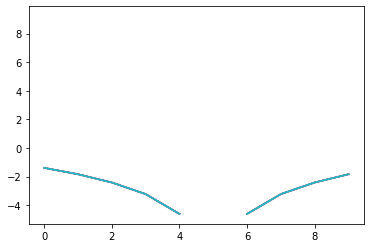

In [5]:
search_space = {
    "a": tune.choice([-50, 50]),
    "b": tune.choice([-50, 50]),
}

analysis1 = tune.run(
    my_trainable,
    config=search_space,
    num_samples=10,
    scheduler=ASHAScheduler(metric="score", mode="min", max_t=10),
)
visualize(analysis1)

## TPE with Hyperopt

Trial name,status,loc,a,b
my_trainable_1237f4de,RUNNING,,33.2632,-4.52989


Result for my_trainable_123abc32:
  date: 2021-04-20_00-51-15
  done: false
  epoch: 1
  experiment_id: 9245db111f114501a812280d708859e1
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 22087
  score: 5.248182703942885
  time_since_restore: 0.00022983551025390625
  time_this_iter_s: 0.00022983551025390625
  time_total_s: 0.00022983551025390625
  timestamp: 1618847475
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 123abc32
  
Result for my_trainable_1237f4de:
  date: 2021-04-20_00-51-15
  done: false
  epoch: 1
  experiment_id: 76339c3be3c34154ae0a3f237181ea34
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 22130
  score: 6.716416809371078
  time_since_restore: 0.009674310684204102
  time_this_iter_s: 0.009674310684204102
  time_total_s: 0.009674310684204102
  timestamp: 1618847475
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 1237f4de
  
Result for my_trainable_123cafc4:
  

Trial name,status,loc,a,b,iter,total time (s),score,epoch
my_trainable_1237f4de,TERMINATED,,33.2632,-4.52989,10,0.196917,6.71631,10
my_trainable_123abc32,TERMINATED,,22.7726,-8.9896,10,0.266138,5.24771,10
my_trainable_123cafc4,TERMINATED,,38.3315,33.7388,10,0.442439,8.55532,10
my_trainable_123f526a,TERMINATED,,41.8723,-5.51675,10,0.188556,7.18681,10
my_trainable_1241130c,TERMINATED,,-32.8128,31.2396,10,0.323973,0.968921,10
my_trainable_124325ca,TERMINATED,,-6.19708,29.9553,10,0.518489,6.33614,10
my_trainable_12457794,TERMINATED,,43.937,23.4028,10,0.252843,8.41954,10
my_trainable_1247e718,TERMINATED,,27.5364,11.7079,10,0.284859,7.33972,10
my_trainable_124bfd44,TERMINATED,,42.0009,4.34031,10,0.0312526,7.67214,10
my_trainable_12a9fb92,TERMINATED,,20.0621,45.5478,10,0.0364292,8.36749,10


2021-04-20 00:51:16,580	INFO tune.py:450 -- Total run time: 1.95 seconds (1.91 seconds for the tuning loop).


{'a': -32.81284386034393, 'b': 31.239598835736317}
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


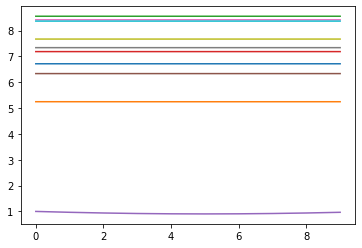

In [6]:
space = {
    "a": hp.uniform("a", -50, 50),
    "b": hp.uniform("b", -50, 50),
}

analysis2 = tune.run(
    my_trainable,
    num_samples=10,
    search_alg=HyperOptSearch(space, metric="score", mode="min", random_state_seed=seed),
)
visualize(analysis2)

## TPE with Optuna

[I 2021-04-20 00:51:16,855] A new study created in memory with name: optuna


Trial name,status,loc,a,b
my_trainable_138a8a72,RUNNING,,-45.8673,30.5385


Result for my_trainable_138a8a72:
  date: 2021-04-20_00-51-17
  done: false
  epoch: 1
  experiment_id: 69ee2a74c8c64897aa20a22e3294acb5
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 22320
  score: 5.46052878270348
  time_since_restore: 0.00019311904907226562
  time_this_iter_s: 0.00019311904907226562
  time_total_s: 0.00019311904907226562
  timestamp: 1618847477
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 138a8a72
  
Result for my_trainable_13915c44:
  date: 2021-04-20_00-51-17
  done: false
  epoch: 1
  experiment_id: a44ce284960c426690513a35e69abcd7
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 22290
  score: 8.375842100456682
  time_since_restore: 0.0003211498260498047
  time_this_iter_s: 0.0003211498260498047
  time_total_s: 0.0003211498260498047
  timestamp: 1618847477
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 13915c44
  
Result for my_trainable_138f912a:


Trial name,status,loc,a,b,iter,total time (s),score,epoch
my_trainable_138a8a72,TERMINATED,,-45.8673,30.5385,10,0.217525,5.46015,10
my_trainable_138dcab6,TERMINATED,,-38.5403,19.6326,10,0.238434,5.87959,10
my_trainable_138f912a,TERMINATED,,28.1064,-37.7894,10,0.498277,4.54244,10
my_trainable_13915c44,TERMINATED,,36.9904,28.8933,10,0.585277,8.37582,10
my_trainable_1392eb36,TERMINATED,,-19.8864,-7.36676,10,0.561222,6.61055,10
my_trainable_1394fd5e,TERMINATED,,3.87292,-20.0839,10,0.466182,5.57198,10
my_trainable_13978e3e,TERMINATED,,45.421,13.9943,10,0.398324,8.16915,10
my_trainable_139b056e,TERMINATED,,-10.0712,41.4016,10,0.0867965,6.88934,10
my_trainable_139f5146,TERMINATED,,-47.3987,-24.6511,10,0.0836501,8.55474,10
my_trainable_140cac82,TERMINATED,,11.6844,-40.22,10,0.0879054,6.7025,10


2021-04-20 00:51:18,552	INFO tune.py:450 -- Total run time: 1.70 seconds (1.66 seconds for the tuning loop).


{'a': 28.106411659917754, 'b': -37.78938808767924}
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


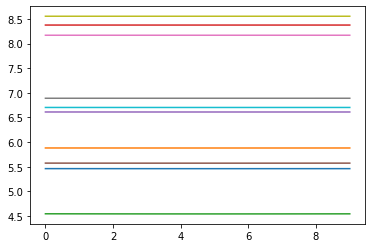

In [7]:
config = {
    "a": tune.uniform(-50, 50),
    "b": tune.uniform(-50, 50),
}

optuna_search = OptunaSearch(
    metric="score",
    mode="min",
)

analysis3 = tune.run(
    my_trainable,
    num_samples=10,
    config=config,
    search_alg=optuna_search
)
visualize(analysis3)

## TPE with Optuna + ASHA

[I 2021-04-20 00:51:18,899] A new study created in memory with name: optuna


Trial name,status,loc,a,b
my_trainable_14c25ea6,RUNNING,,-18.4336,1.83013


Result for my_trainable_14c25ea6:
  date: 2021-04-20_00-51-19
  done: false
  epoch: 1
  experiment_id: d034312e6599443b8b1dfc7bded3f668
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 22481
  score: 5.620131792460598
  time_since_restore: 0.009899616241455078
  time_this_iter_s: 0.009899616241455078
  time_total_s: 0.009899616241455078
  timestamp: 1618847479
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 14c25ea6
  
Result for my_trainable_14c6d99a:
  date: 2021-04-20_00-51-19
  done: true
  epoch: 1
  experiment_id: 6deb15b1594f42a58041b6ee7e4eb49a
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 22462
  score: 6.436810879829127
  time_since_restore: 0.004114389419555664
  time_this_iter_s: 0.004114389419555664
  time_total_s: 0.004114389419555664
  timestamp: 1618847479
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 14c6d99a
  
Result for my_trainable_14ccd458:
  date: 2

Trial name,status,loc,a,b,iter,total time (s),score,epoch
my_trainable_14c25ea6,TERMINATED,,-18.4336,1.83013,10,0.533737,5.61981,10
my_trainable_14c6d99a,TERMINATED,,-23.9395,48.9228,1,0.00411439,6.43681,1
my_trainable_14c8d60a,TERMINATED,,26.5878,-15.6832,1,0.0172069,4.78047,1
my_trainable_14cadd88,TERMINATED,,17.9836,-22.2627,10,0.561211,2.91619,10
my_trainable_14ccd458,TERMINATED,,23.861,-26.9376,10,0.400118,2.2644,10
my_trainable_14cefc88,TERMINATED,,10.3604,34.6897,1,0.00031209,7.61567,1
my_trainable_14d147b8,TERMINATED,,35.1981,39.3715,1,0.00156474,8.62351,1
my_trainable_14d51e2e,TERMINATED,,-25.3755,5.74376,1,0.000329018,5.95495,1
my_trainable_14d8436a,TERMINATED,,6.66303,48.8678,1,0.000270128,8.03396,1
my_trainable_153fc1f2,TERMINATED,,49.0742,21.1804,1,0.000512362,8.5043,1


2021-04-20 00:51:21,369	INFO tune.py:450 -- Total run time: 2.48 seconds (2.42 seconds for the tuning loop).


{'a': 23.86101432564209, 'b': -26.93759484403705}
[10, 1, 1, 10, 10, 1, 1, 1, 1, 1]


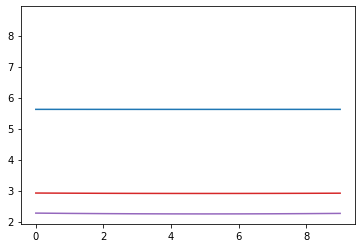

In [8]:
config = {
    "a": tune.uniform(-50, 50),
    "b": tune.uniform(-50, 50),
}

optuna_search = OptunaSearch(
    metric="score",
    mode="min",   
)

analysis4 = tune.run(
    my_trainable,
    num_samples=10,
    config=config,
    search_alg=optuna_search,
    scheduler=ASHAScheduler(metric="score", mode="min"),
)
visualize(analysis4)

## BOHB with TuneBOHB

2021-04-20 00:51:22,119	WARNING suggestion.py:263 -- save not implemented for Searcher. Skipping save.


Trial name,status,loc,a,b
my_trainable_16aaeae4,RUNNING,,-12.546,45.0714


Result for my_trainable_16aaeae4:
  date: 2021-04-20_00-51-22
  done: false
  epoch: 1
  experiment_id: fbd691e1cf914b7ba409d80c44c22c94
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 22700
  score: 6.964281548361162
  time_since_restore: 0.000335693359375
  time_this_iter_s: 0.000335693359375
  time_total_s: 0.000335693359375
  timestamp: 1618847482
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 16aaeae4
  
Result for my_trainable_16b21008:
  date: 2021-04-20_00-51-22
  done: false
  epoch: 1
  experiment_id: 30dca67a85d44a44bc82d03e3763d5da
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 22637
  score: 4.053797576208638
  time_since_restore: 0.00028133392333984375
  time_this_iter_s: 0.00028133392333984375
  time_total_s: 0.00028133392333984375
  timestamp: 1618847482
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 16b21008
  
Result for my_trainable_16ae3500:
  date: 202

2021-04-20 00:51:23,645	INFO hyperband.py:441 -- Restoring from a previous point in time. Previous=1; Now=1
2021-04-20 00:51:23,661	INFO hyperband.py:441 -- Restoring from a previous point in time. Previous=1; Now=1
(pid=22640) 2021-04-20 00:51:23,656	INFO trainable.py:371 -- Restored on 172.17.154.109 from checkpoint: /home/hotohoto/ray_results/my_trainable_2021-04-20_00-51-22/my_trainable_16ae3500_2_a=23.199,b=9.8658_2021-04-20_00-51-22/checkpoint_tmpeeb9fd/./
(pid=22640) 2021-04-20 00:51:23,657	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 0.00027370452880859375, '_episodes_total': 0}
(pid=22647) 2021-04-20 00:51:23,642	INFO trainable.py:371 -- Restored on 172.17.154.109 from checkpoint: /home/hotohoto/ray_results/my_trainable_2021-04-20_00-51-22/my_trainable_16aaeae4_1_a=-12.546,b=45.071_2021-04-20_00-51-22/checkpoint_tmpb7e0b4/./
(pid=22647) 2021-04-20 00:51:23,642	INFO trainable.py:379 -- Current state after restor

Result for my_trainable_16aaeae4:
  date: 2021-04-20_00-51-26
  done: true
  episodes_total: 0
  epoch: 10
  experiment_id: fbd691e1cf914b7ba409d80c44c22c94
  experiment_tag: 1_a=-12.546,b=45.071
  hostname: hotohoto-nb
  iterations_since_restore: 10
  node_ip: 172.17.154.109
  pid: 22911
  score: 6.964196490994621
  time_since_restore: 0.18800687789916992
  time_this_iter_s: 0.01223444938659668
  time_total_s: 0.5328881740570068
  timestamp: 1618847486
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 10
  trial_id: 16aaeae4
  
Result for my_trainable_16b21008:
  date: 2021-04-20_00-51-26
  done: true
  episodes_total: 0
  epoch: 10
  experiment_id: 30dca67a85d44a44bc82d03e3763d5da
  experiment_tag: 4_a=-44.192,b=36.618
  hostname: hotohoto-nb
  iterations_since_restore: 10
  node_ip: 172.17.154.109
  pid: 22889
  score: 4.052234284546439
  time_since_restore: 0.16045522689819336
  time_this_iter_s: 0.013900518417358398
  time_total_s: 0.47065043449401855
  times

Trial name,status,loc,a,b,iter,total time (s),ts,score,epoch
my_trainable_1959a42e,RUNNING,,-47.9416,46.991,,,,,
my_trainable_195d6adc,RUNNING,,33.2443,-28.7661,,,,,
my_trainable_19630488,RUNNING,,-31.8175,-31.6595,,,,,
my_trainable_18f5a60e,PAUSED,,10.1115,20.8073,3,0.048219,,6.86282,3
my_trainable_16aaeae4,TERMINATED,,-12.546,45.0714,10,0.532888,0,6.9642,10
my_trainable_16ae3500,TERMINATED,,23.1994,9.86585,10,0.987484,0,6.99711,10
my_trainable_16b03be8,TERMINATED,,-34.3981,-34.4005,9,0.382707,0,8.46239,9
my_trainable_16b21008,TERMINATED,,-44.1916,36.6176,10,0.47065,0,4.05223,10


Result for my_trainable_19630488:
  date: 2021-04-20_00-51-27
  done: false
  epoch: 1
  experiment_id: b4a51d9d953a4e6d95f77bebb5b06c74
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 23013
  score: 8.301418961809018
  time_since_restore: 0.0002884864807128906
  time_this_iter_s: 0.0002884864807128906
  time_total_s: 0.0002884864807128906
  timestamp: 1618847487
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '19630488'
  
Result for my_trainable_1959a42e:
  date: 2021-04-20_00-51-28
  done: false
  epoch: 1
  experiment_id: 8c863df0bd124d9088976727d2b8ee65
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 23005
  score: 0.1428653762118686
  time_since_restore: 0.0003840923309326172
  time_this_iter_s: 0.0003840923309326172
  time_total_s: 0.0003840923309326172
  timestamp: 1618847488
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 1959a42e
  
Result for my_trainable_195d6adc:

2021-04-20 00:51:28,971	INFO hyperband.py:441 -- Restoring from a previous point in time. Previous=3; Now=1
2021-04-20 00:51:29,027	INFO hyperband.py:441 -- Restoring from a previous point in time. Previous=3; Now=1
(pid=23036) 2021-04-20 00:51:29,021	INFO trainable.py:371 -- Restored on 172.17.154.109 from checkpoint: /home/hotohoto/ray_results/my_trainable_2021-04-20_00-51-22/my_trainable_1959a42e_6_a=-47.942,b=46.991_2021-04-20_00-51-26/checkpoint_tmp01fcb7/./
(pid=23036) 2021-04-20 00:51:29,021	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 0.15294551849365234, '_episodes_total': 0}
(pid=23060) 2021-04-20 00:51:28,964	INFO trainable.py:371 -- Restored on 172.17.154.109 from checkpoint: /home/hotohoto/ray_results/my_trainable_2021-04-20_00-51-22/my_trainable_18f5a60e_5_a=10.112,b=20.807_2021-04-20_00-51-25/checkpoint_tmp809979/./
(pid=23060) 2021-04-20 00:51:28,964	INFO trainable.py:379 -- Current state after restoring

Result for my_trainable_195d6adc:
  date: 2021-04-20_00-51-30
  done: true
  episodes_total: 0
  epoch: 10
  experiment_id: 0d4773ca13f14a7f9600354f3e0106cb
  experiment_tag: 7_a=33.244,b=-28.766
  hostname: hotohoto-nb
  iterations_since_restore: 10
  node_ip: 172.17.154.109
  pid: 23008
  score: 3.006378038526816
  time_since_restore: 0.14437055587768555
  time_this_iter_s: 0.011916637420654297
  time_total_s: 0.7384765148162842
  timestamp: 1618847490
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 10
  trial_id: 195d6adc
  
Result for my_trainable_1959a42e:
  date: 2021-04-20_00-51-30
  done: true
  episodes_total: 0
  epoch: 10
  experiment_id: 8c863df0bd124d9088976727d2b8ee65
  experiment_tag: 6_a=-47.942,b=46.991
  hostname: hotohoto-nb
  iterations_since_restore: 10
  node_ip: 172.17.154.109
  pid: 23010
  score: 0.061635398004388595
  time_since_restore: 0.13298368453979492
  time_this_iter_s: 0.010404109954833984
  time_total_s: 0.5919756889343262
  ti

(pid=23191) 2021-04-20 00:51:30,746	INFO trainable.py:371 -- Restored on 172.17.154.109 from checkpoint: /home/hotohoto/ray_results/my_trainable_2021-04-20_00-51-22/my_trainable_19630488_8_a=-31.818,b=-31.66_2021-04-20_00-51-26/checkpoint_tmp9ebc73/./
(pid=23191) 2021-04-20 00:51:30,747	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 0.5988776683807373, '_episodes_total': 0}
2021-04-20 00:51:30,775	INFO hyperband.py:441 -- Restoring from a previous point in time. Previous=9; Now=1


Result for my_trainable_19630488:
  date: 2021-04-20_00-51-30
  done: true
  episodes_total: 0
  epoch: 10
  experiment_id: b4a51d9d953a4e6d95f77bebb5b06c74
  experiment_tag: 8_a=-31.818,b=-31.66
  hostname: hotohoto-nb
  iterations_since_restore: 10
  node_ip: 172.17.154.109
  pid: 23191
  score: 8.301396626759876
  time_since_restore: 0.13652586936950684
  time_this_iter_s: 0.009377717971801758
  time_total_s: 0.7354035377502441
  timestamp: 1618847490
  timesteps_since_restore: 0
  timesteps_total: 0
  training_iteration: 10
  trial_id: '19630488'
  


2021-04-20 00:51:31,798	WARNING tune.py:429 -- Trial Runner checkpointing failed: Checkpoint must not be in-memory.


Result for my_trainable_1b941832:
  date: 2021-04-20_00-51-31
  done: false
  epoch: 1
  experiment_id: 13829c36cd00436e84f8151154262178
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 23214
  score: 5.679027014212735
  time_since_restore: 0.00024509429931640625
  time_this_iter_s: 0.00024509429931640625
  time_total_s: 0.00024509429931640625
  timestamp: 1618847491
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 1b941832
  
Result for my_trainable_1b9913b4:
  date: 2021-04-20_00-51-31
  done: false
  epoch: 1
  experiment_id: 49ed835d85fc452c81d9c4f20c0dfadf
  hostname: hotohoto-nb
  iterations_since_restore: 1
  node_ip: 172.17.154.109
  pid: 23218
  score: 6.641933145309956
  time_since_restore: 0.00035762786865234375
  time_this_iter_s: 0.00035762786865234375
  time_total_s: 0.00035762786865234375
  timestamp: 1618847491
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 1b9913b4
  
Result for my_trainable_1b9418

Trial name,status,loc,a,b,iter,total time (s),ts,score,epoch
my_trainable_16aaeae4,TERMINATED,,-12.546,45.0714,10,0.532888,0,6.9642,10
my_trainable_16ae3500,TERMINATED,,23.1994,9.86585,10,0.987484,0,6.99711,10
my_trainable_16b03be8,TERMINATED,,-34.3981,-34.4005,9,0.382707,0,8.46239,9
my_trainable_16b21008,TERMINATED,,-44.1916,36.6176,10,0.47065,0,4.05223,10
my_trainable_18f5a60e,TERMINATED,,10.1115,20.8073,10,0.424474,0,6.86289,10
my_trainable_1959a42e,TERMINATED,,-47.9416,46.991,10,0.591976,0,0.0616354,10
my_trainable_195d6adc,TERMINATED,,33.2443,-28.7661,10,0.738477,0,3.00638,10
my_trainable_19630488,TERMINATED,,-31.8175,-31.6595,10,0.735404,0,8.3014,10
my_trainable_1b941832,TERMINATED,,-19.5758,2.47564,10,0.083744,,5.67872,10
my_trainable_1b9913b4,TERMINATED,,-6.8055,-20.8771,10,0.0989304,,6.64182,10


2021-04-20 00:51:31,811	INFO tune.py:450 -- Total run time: 9.72 seconds (9.70 seconds for the tuning loop).


{'a': -47.94155057041976, 'b': 46.990985216199434}
[10, 10, 9, 10, 10, 10, 10, 10, 10, 10]


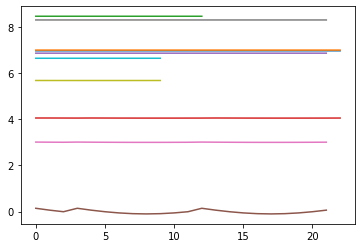

In [9]:
config = {
    "a": tune.uniform(-50, 50),
    "b": tune.uniform(-50, 50),
}

algo = ConcurrencyLimiter(
    TuneBOHB(metric="score", mode="min", seed=seed),
    max_concurrent=4,
)
bohb = HyperBandForBOHB(
    time_attr="training_iteration",
    metric="score",
    mode="min",
    max_t=100,
)
analysis5 = tune.run(
    my_trainable,
    num_samples=10, # this needs to be specified, or all the config generated would be the same.
    config=config,
    scheduler=bohb,
    search_alg=algo,
)
visualize(analysis5)